# Исследование данных о пользователях сервиса аренды самокатов GoFast

**Описание проекта**

Я аналитик популярного сервиса аренды самокатов GoFast. Мне передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируем данные и проверим некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. 

Сервисом можно пользоваться:
- без подписки
     - абонентская плата отсутствует;
     - стоимость одной минуты поездки — 8 рублей;
     - стоимость старта (начала поездки) — 50 рублей;
     
- с подпиской Ultra
     - абонентская плата — 199 рублей в месяц;
     - стоимость одной минуты поездки — 6 рублей;
     - стоимость старта — бесплатно.

Для анализа нам предоставлены 3 таблицы.

**Описание данных**

В основных данных есть информация о пользователях, их поездках и подписках.
Пользователи — users_go.csv
- user_id - уникальный идентификатор пользователя
- name - имя пользователя
- age - возраст
- city - город
- subscription_type - тип подписки (free, ultra)
  
Поездки — rides_go.csv
- user_id - уникальный идентификатор пользователя
- distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date - дата совершения поездки
  
Подписки — subscriptions_go.csv
- subscription_type - тип подписки
- minute_price - стоимость одной минуты поездки по данной подписке
- start_ride_price - стоимость начала поездки
- subscription_fee - стоимость ежемесячного платежа

**Цели исследования:**
- ознакомиться с исходными данными;
- подготовить данные к анализу: проверить на наличие пропущенных значений и дубликатов;
- описать и визуализировать общую информацию о пользователях и поездках;
- объединить данные о пользователях, поездках и подписках в один датафрейм;
- рассчитать помесячную выручку по каждому пользователю;
- проверить предложенные гипотезы, которые могут улучшить работу бизнеса.

## Загрузка данных

### Считаем CSV-файлы с данными с помощью библиотеки Pandas и сохраним их в датафреймы



In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
#откроем файл с данными о пользователях
data_users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')

In [3]:
#откроем файл с данными о поездках
data_riders = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')

In [4]:
#откроем файл с данными о подписках
data_subs = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

Сохранили файлы в 3 датафрейма: data_users (данные о пользователях), data_riders (данные о поездках), data_subs (данные о подписках).

### Выведем первые строки каждого набора данных и изучим информацию

In [5]:
#выведем первые строки датафрейма о пользователях
data_users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [6]:
#посчитаем количество пользователей в исходной таблице
data_users_initial = len(data_users)
data_users_initial

1565

In [7]:
#запросим все атрибуты таблицы о пользователях
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Таблица data_users содержит информацию о 1565 пользователях и 5 параметров с характеристиками. В набор данных входят 2 типа данных: строки и целые числа. Нет необходимости преобразовывать столбцы к другим типам данных. Также обращаем внимание на отсутствие пропущенных значений. Названия столбцов изначально приведены к хорошему стилю. Длину датафрема заключили в параметр data_users_initial, т.к. это значение пригодится нам в дальнейших расчетах.

In [8]:
#выведем первые строки датафрейма о поездках
data_riders.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [9]:
#запросим все атрибуты таблицы о поездках
data_riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Таблица data_riders содержит информацию о 18068 поездках и 4 параметра с характеристиками. В набор данных входят 3 типа данных: строки, целые и вещественные числа. Необходимо преобразовать столбец date в datetime. Также обращаем внимание на отсутствие пропущенных значений. Названия столбцов изначально приведены к хорошему стилю.

In [10]:
#выведем первые строки датафрейма о подписках
data_subs.head(10)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [11]:
#запросим все атрибуты таблицы о подписках
data_subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


Таблица data_subs содержит информацию о 2х видах подписок (с подпиской и без) и 4 параметра с характеристиками. В набор данных входят 2 типа данных: строки и целые числа. Нет необходимости преобразовывать столбцы к другим типам данных. Также обращаем внимание на отсутствие пропущенных значений. Названия столбцов изначально приведены к хорошему стилю.

**Вывод:** Открыли файлы и сохранили их в 3 датафрейма: data_users (данные о пользователях), data_riders (данные о поездках), data_subs (данные о подписках). Ознакомились с исходными таблицами и на основе полученных данных выявили, что: 

- в датафрейме data_riders необходимо преобразовать столбец date в datetime;
- пропущенные значения в данных отсутствуют;
- названия столбцов всех датафреймов изначально приведены к хорошему стилю;
- необходимо выявить наличие дубликатов (явных и неявных).

## Предобработка данных

### Приведем столбец date к типу даты Pandas

In [12]:
#столбец date приведем к типу datetime
data_riders['date'] = pd.to_datetime(data_riders['date'], format='%Y-%m-%d')

#проверим
data_riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Столбец date датафрейма data_riders успешно принял тип данных datetime.

### Создадим новый столбец с номером месяца на основе столбца date

In [13]:
#добавим в таблицу новый столбец с номером месяца
data_riders['month'] = data_riders['date'].dt.month

#проверим
data_riders.head(10)

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
5,1,2770.890808,16.650138,2021-10-09,10
6,1,3039.020292,14.927879,2021-10-19,10
7,1,2842.118050,23.117468,2021-11-06,11
8,1,3412.690668,15.238072,2021-11-14,11
9,1,748.690645,15.041884,2021-11-22,11


В датафрейм data_riders успешно добавили новый столбец month с номером месяца на основе столбца date.

Проверим, за какой период предоставлены данные.

In [14]:
#найдем min и max значения в столбце date
date_min = data_riders['date'].min()
date_max = data_riders['date'].max()

print(f'В датафрейме data_riders предоставлены данные за период с {date_min} по {date_max}.')

В датафрейме data_riders предоставлены данные за период с 2021-01-01 00:00:00 по 2021-12-30 00:00:00.


Проверим столбец duration на предмет наличия аномальных зачений.

In [15]:
#проверим столбец duration на наличие аномальных значений
data_riders['duration'].sort_values(ascending=True)

12013     0.500000
17314     0.500000
15029     0.500000
7437      0.500000
12967     0.500000
           ...    
6453     38.265229
1998     38.352763
2623     39.526602
4709     39.873856
4215     40.823963
Name: duration, Length: 18068, dtype: float64

Обнаружено, что минимальная продолжительность поездки - 0,5 мин. Слишком короткая продолжительность для езды на самокате, похоже на выброс. Вероятно, активиров сессию поездки, пользователь передумал кататься или произошла техническая ошибка. Не будем удалять строки с аномальными значениями, а на этапе исследовательского анализа данных построим гистограмму, исключив выбросы.

### Проверим наличие пропущенных значений и дубликатов в датафреймах, обработаем их

In [16]:
#проверим наличие явных дубликатов в таблице с пользователями
data_users.duplicated().sum()

31

In [17]:
#удалим явные дубликаты и присвоим новые индексы строкам
data_users = data_users.drop_duplicates().reset_index(drop=True) 

#проверим
data_users.duplicated().sum()

0

In [18]:
#проверим наличие явных дубликатов в таблице с поездками
data_riders.duplicated().sum()

0

31 явный дубликат был обнаружен в датафрейме data_users. Удалили дубликаты и присвоили строкам новые индексы. В других датафреймах явные дубликаты не обнаружены.

In [19]:
#проверим уникальные узначения в столбце city
data_users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Неявные дубликаты в данных отсутствуют.

In [20]:
#проверим наличие пропущенных значений в датафрейме с пользователями
data_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [21]:
#проверим наличие пропущенных значений в датафрейме с поездками
data_riders.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [22]:
#проверим наличие пропущенных значений в датафрейме с подписками
data_subs.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Еще раз убедились, что пропущенные значения во всех датафреймах отсутствуют.

Также необходимо проверить, какая доля данных от исходной таблицы data_users осталась после предобработки.

In [23]:
#посчитаем долю оставшихся данных после предобработки
print(len(data_users) / data_users_initial * 100)

#посмотрим, сколько объявлений было удалено
print(data_users_initial - len(data_users))

98.01916932907349
31


**Вывод:** На этапе предобработки данных:
- в датафрейме data_riders столбец date преобразовали в тип datetime;
- в датафрейм data_riders успешно добавили новый столбец month с номером месяца на основе столбца date;
- обнаружен 31 явный дубликат в датафрейме data_users, удалили дубликаты и присвоили строкам новые индексы;
- выявлены аномальные значения в столбце duration датафрейма data_riders
- не обнаружены неявные дубликаты;
- не обнаружены пропущенные значения.

В результате предобработки данных в датафрейме data_users был удален 31 пользователь. Текущая таблица содержит 98% данных из исходной таблицы.

Также выяснили, что в датафрейме data_riders предоставлены данные за период с 1 января 2021 года по 30 декабря 2021 года.

## Исследовательский анализ данных

**Опишем и визуализируем общую информацию о пользователях и поездках:**

### частота встречаемости городов

In [24]:
#запросим дополнительные характеристики столбца city
data_users['city'].describe()

count          1534
unique            8
top       Пятигорск
freq            219
Name: city, dtype: object

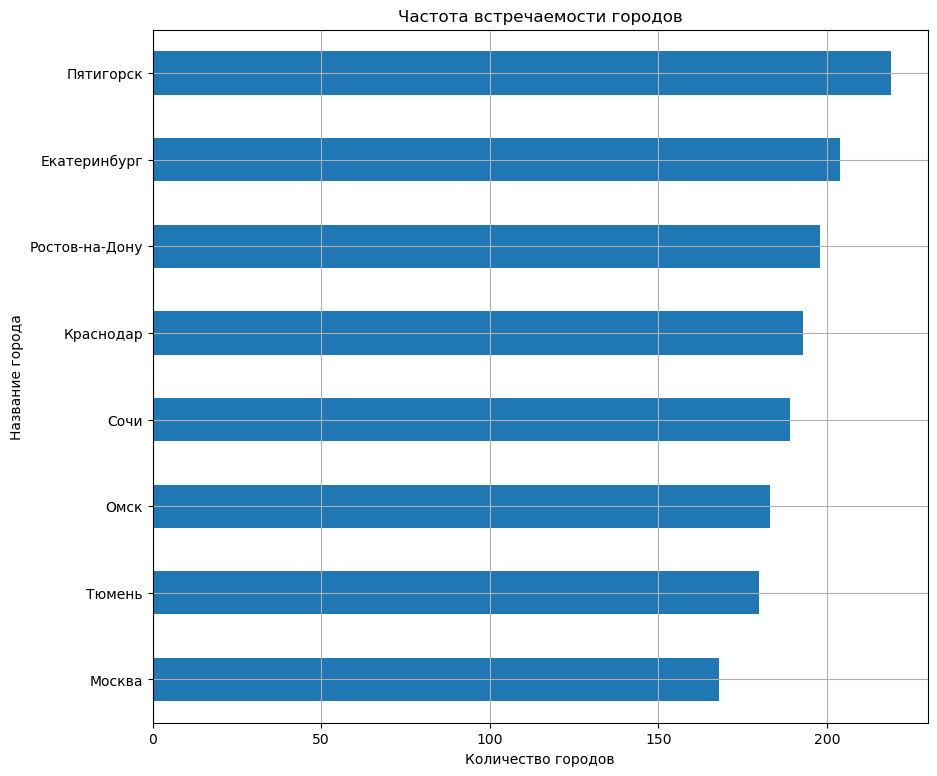

In [25]:
data_users['city'].value_counts(ascending = True).plot.barh(figsize=(10, 9), grid = True)

plt.title('Частота встречаемости городов')
plt.xlabel('Количество городов')
plt.ylabel('Название города')
plt.show()

На гистограмме видно, что распредение городов находится в диапазоне от 170 до 220. В данных чаще всего встречаются пользователи, совершающие поездки в Пятигорске. Реже всего пользователи пользуются сервисом GoFast в Москве. Вероятно, в столице много других сервисов аренды самокатов, присутствует большая конкуренция.

### соотношение пользователей с подпиской и без подписки

In [26]:
#запросим дополнительные характеристики столбца subscription_type
data_users['subscription_type'].describe()

count     1534
unique       2
top       free
freq       835
Name: subscription_type, dtype: object

In [27]:
#найдем долю пользователей без подписки
users_free = data_users.query('subscription_type == "free"')
users_free_share = len(users_free) / len(data_users) * 100

users_free_share

54.43285528031291

In [28]:
#найдем долю пользователей с подпиской
users_ultra = data_users.query('subscription_type == "ultra"')
users_ultra_share = len(users_ultra) / len(data_users) * 100

users_ultra_share

45.56714471968709

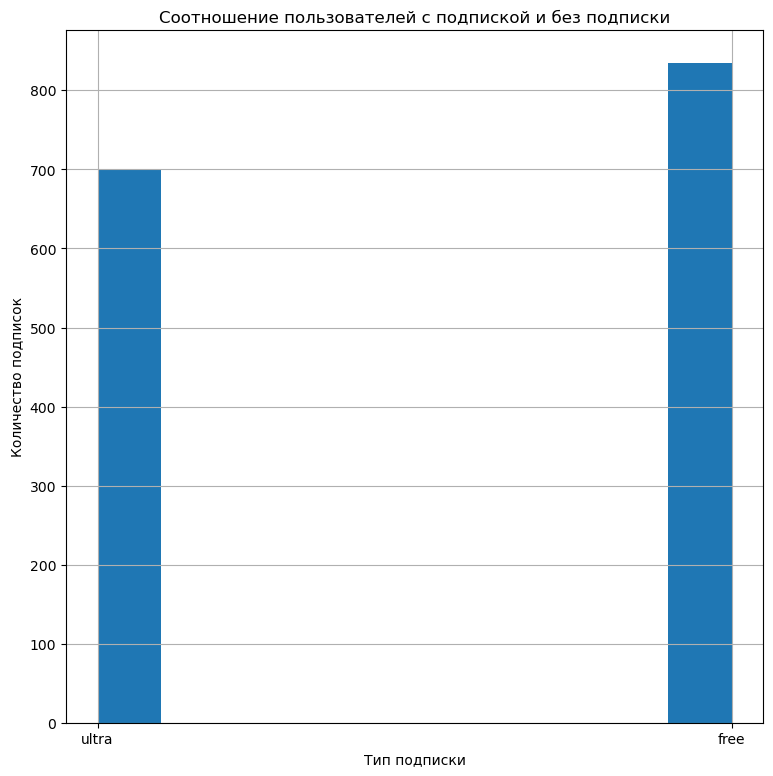

In [29]:
#построим гистограмму для столбца subscription_type
data_users['subscription_type'].hist(figsize=(9, 9), grid = True)

plt.title('Соотношение пользователей с подпиской и без подписки')
plt.xlabel('Тип подписки')
plt.ylabel('Количество подписок')
plt.show()

Общее количество уникальных пользователей, пользующихся сервисом GoFast - 1534. Доля пользователей без подписки составляет примерно 54%, что больше, чем доля пользователей с подпиской (примерно 45%). Убеждаемся в этом, построив гистограмму. 835 пользователей предпочитают не оформлять подписку. 

### возраст пользователей

In [30]:
#запросим дополнительные характеристики столбца age
data_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

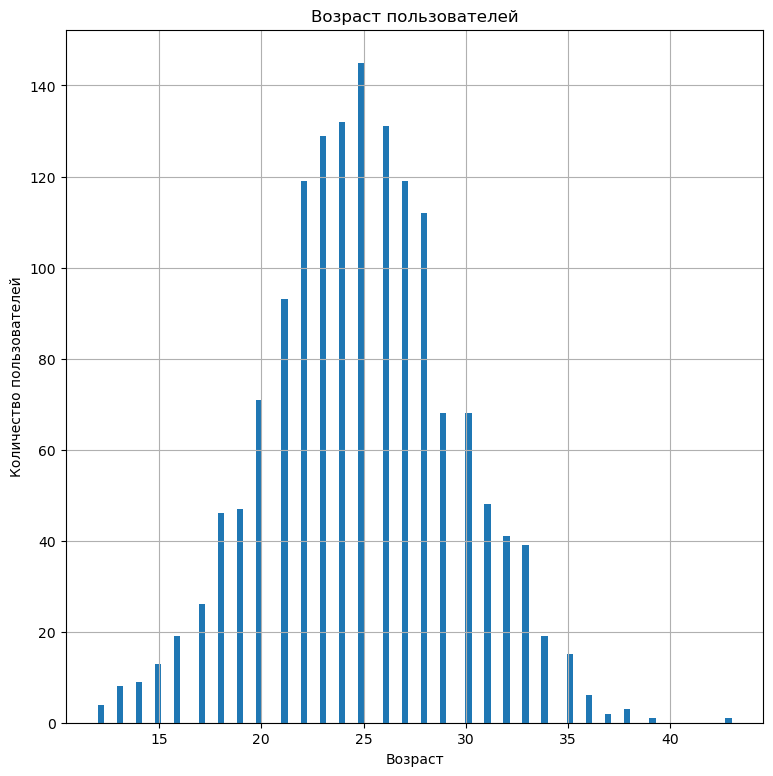

In [31]:
#построим гистограмму для столбца age
data_users.hist(column = 'age',  figsize=(9, 9), grid = True, bins = 100)

plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()

Среднее значение в столбце age - 24, а медиана - 25. Построили гистограмму, видно, что действительно чаще всего встречаются пользователи в возрасте 25 лет (таких примерно 145 человек). Реже всего встречаются пользователи старше 35 лет. График имеет вид нормального распределения.

### расстояние, которое пользователь преодолел за одну поездку

In [32]:
#запросим дополнительные характеристики столбца distance
data_riders['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

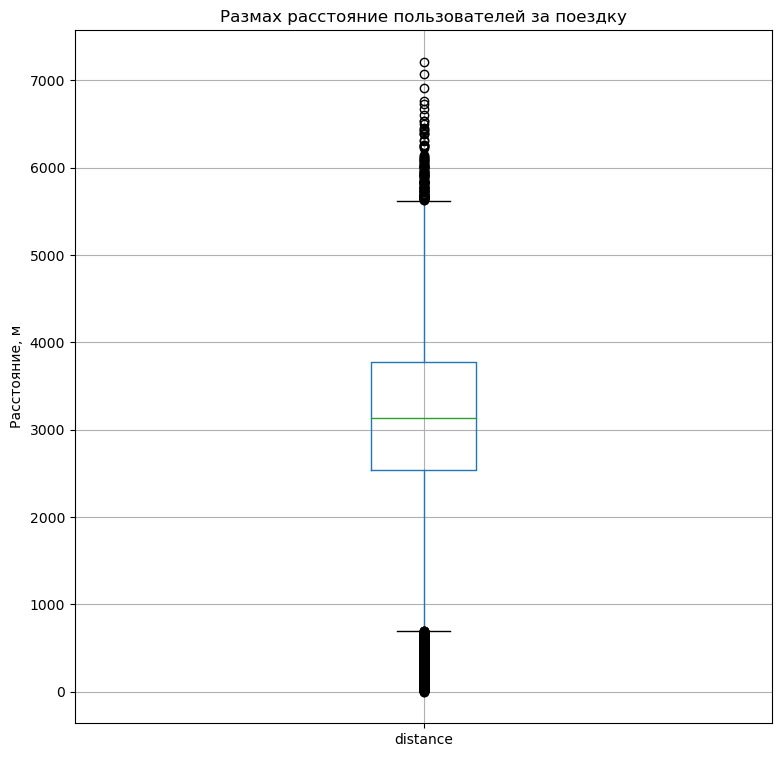

In [33]:
#построим диаграмму размаха для столбца distance
data_riders.boxplot(column='distance', figsize=(9, 9))
plt.title('Размах расстояние пользователей за поездку')
plt.ylabel('Расстояние, м')
plt.show()

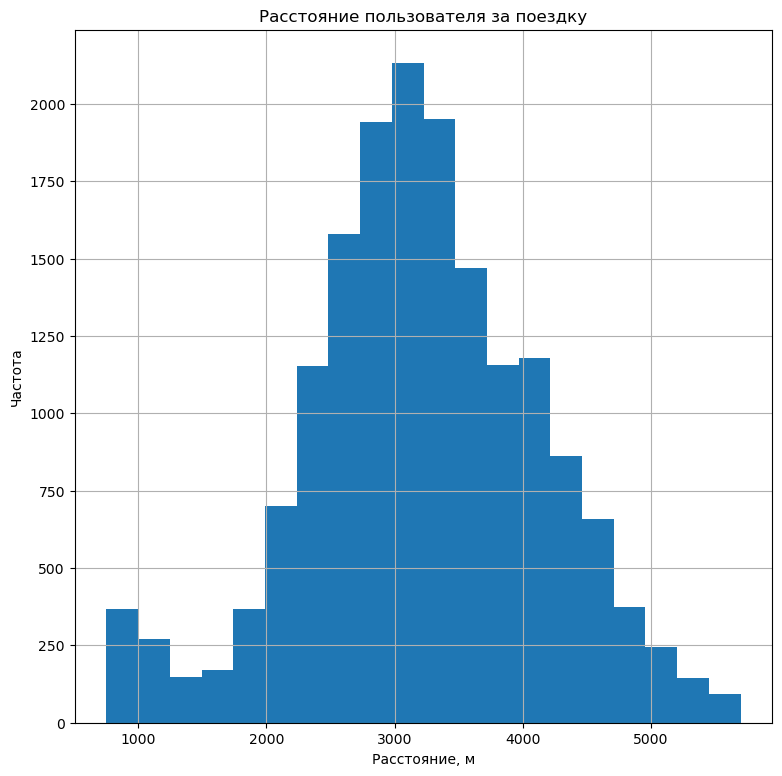

In [34]:
#построим гистограмму для столбца distance, исключив выбросы
(
data_riders.query('750 <= distance <= 5700')
    .hist(column = 'distance', figsize=(9, 9), grid = True, bins = 20)
)

plt.title('Расстояние пользователя за поездку')
plt.xlabel('Расстояние, м')
plt.ylabel('Частота')
plt.show()

Запросили дополнительные характеристики столбца distance и обнаружили, что минимальное расстояние, которое проделал пользователь, составляет 0,85 м. Слишком маленькое расстояние для езды на самокате, похоже на выброс. Вероятно, активиров сессию поездки, пользователь передумал кататься или произошла техническая ошибка. В связи с этим построили гистограмму, исключив выбросы. Среднее значение в столбце distance - 3070 м, а медиана - 3133 м. На гистограмме видно, что действительно чаще всего пользователи преодолевали расстояние в диапазоне от 3000 до 3250 м. Также встречается пик в пределах 1000 м. Скорее всего, в данном случае пользователи арендовали самокат для поездки до магазина или метро, а не для прогулки. Реже всего пользователи преодолевали расстояния в 1500 м и более 5000 м.

### продолжительность поездок

In [35]:
#запросим дополнительные характеристики столбца duration
data_riders['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

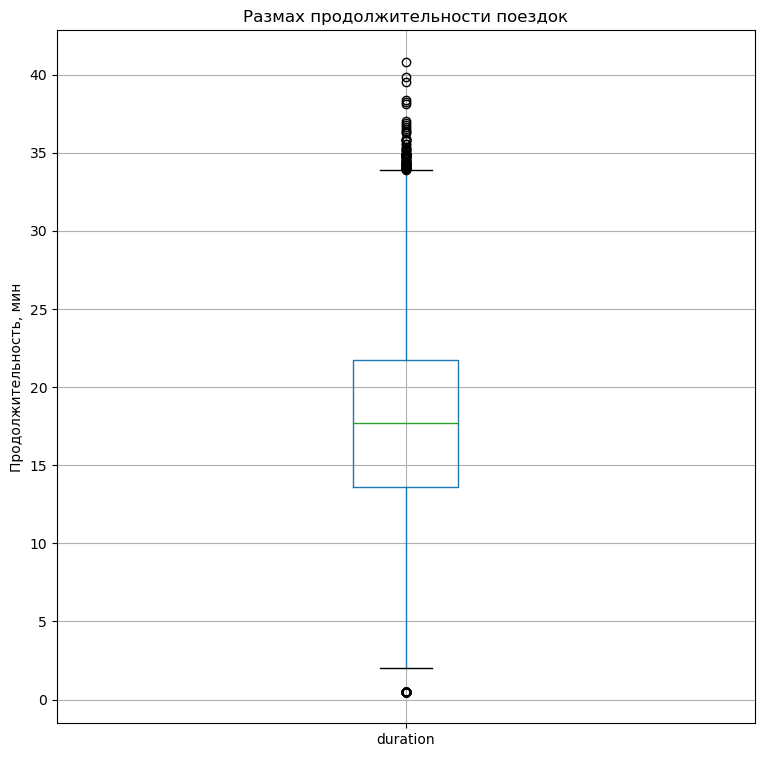

In [36]:
#построим диаграмму размаха для столбца duration
data_riders.boxplot(column='duration', figsize=(9, 9))
plt.title('Размах продолжительности поездок')
plt.ylabel('Продолжительность, мин')
plt.show()

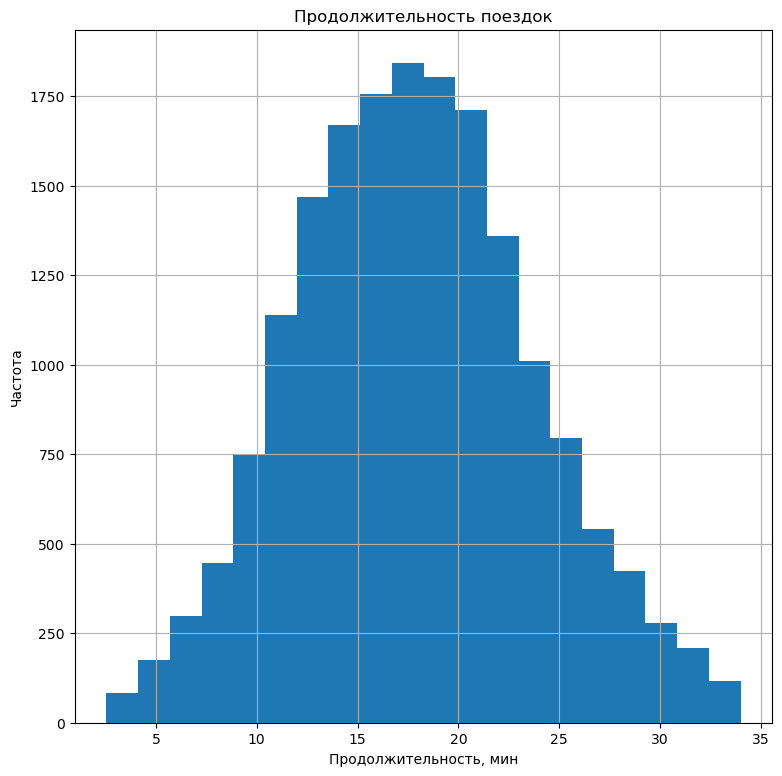

In [37]:
#построим гистограмму для столбца total_area, исключив выбросы
(
data_riders.query('2.5 <= duration <= 34')
    .hist(column = 'duration', figsize=(9, 9), grid = True, bins = 20)
)

plt.title('Продолжительность поездок')
plt.xlabel('Продолжительность, мин')
plt.ylabel('Частота')
plt.show()

Запросили дополнительные характеристики столбца duration и обнаружили, что минимальная продолжительность проездки - 0,5 мин. Слишком короткая продолжительность для езды на самокате, похоже на выброс. Вероятно, активиров сессию поездки, пользователь передумал кататься или произошла техническая ошибка. В связи с этим построили гистограмму, исключив выбросы. График стремится к нормальному распределению. Среднее значение в столбце duration - 17,8 мин, а медиана - 17,6 мин. На гистограмме видно, что действительно чаще всего пользователи тратили на поездку 17,5-18 мин. Реже всего пользователи тратили на одну поездку меньше 5 минут и больше 33 минут.

**Вывод:** На данном этапе выявили характеристики самых распространенных поездок:

- поездки чаще всего совершались в Пятигорске;
- пользователи предпочитают совершать поездки без оформления подписки;
- самый популярный пользователь - в возрасте 25 лет;
- в среднем пользователи преодолевают расстояние от 3000 до 3250 м;
- в среднем каждый пользователь тратит на одну поездку 17,5-18 мин.

## Объединение данных

### Объединим данные о пользователях, поездках и подписках в один датафрейм

In [38]:
#объединим 3 исходных датафрейма
data_total = data_riders.merge(data_users, on='user_id')
data_total = data_total.merge(data_subs, on='subscription_type')

#проверим
data_total

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


Получили общий датафрейм data_total, путем успешного объединения 3х датафреймов. Новая таблица имеет информацию о 18068 поездках по 12 характеристикам.

### Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1:
- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.

In [39]:
#создадим датафрейм, с данными о пользователях с подпиской
data_subs_ultra = data_total.query('subscription_type == "ultra"')

#проверим
data_subs_ultra

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,3973.046497,24.671163,2021-08-29,8,Оксана,22,Москва,ultra,6,0,199
6496,699,3288.702563,15.892886,2021-09-12,9,Оксана,22,Москва,ultra,6,0,199
6497,699,3076.159348,14.389525,2021-09-26,9,Оксана,22,Москва,ultra,6,0,199
6498,699,4707.845501,15.839579,2021-10-17,10,Оксана,22,Москва,ultra,6,0,199


In [40]:
#создадим датафрейм, с данными о пользователях без подписки
data_subs_free = data_total.query('subscription_type == "free"')

#проверим
data_subs_free

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


Создали 2 датафрейма data_subs_ultra (с данными о пользователях с подпиской) и data_subs_free (с данными о пользователях без подписки) на основе датафрейма data_total. data_subs_ultra содержит данные о 6500 поездках, а data_subs_free - о 11568 поездках. 

### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий

In [41]:
#запросим дополнительные характеристики датафрейма data_subs_ultra
data_subs_ultra.describe()

,user_id,distance,duration,date,month,age,minute_price,start_ride_price,subscription_fee
count,6500.000000,6500.000000,6500.000000,6500,6500.000000,6500.000000,6500.0,6500.0,6500.0
mean,348.725385,3115.445388,18.541985,2021-06-28 21:31:34.153846016,6.422308,24.892615,6.0,0.0,199.0
min,1.000000,244.210438,3.760353,2021-01-01 00:00:00,1.000000,12.000000,6.0,0.0,199.0
25%,175.000000,2785.444017,14.524654,2021-04-01 00:00:00,4.000000,22.000000,6.0,0.0,199.0
50%,351.000000,3148.637229,18.178153,2021-06-27 00:00:00,6.000000,25.000000,6.0,0.0,199.0
75%,525.000000,3560.574425,21.884129,2021-09-25 00:00:00,9.000000,28.000000,6.0,0.0,199.0
max,699.000000,5699.769662,40.823963,2021-12-30 00:00:00,12.000000,38.000000,6.0,0.0,199.0
std,201.099339,836.895330,5.572048,NaN,3.414616,4.757208,0.0,0.0,0.0


In [42]:
#запросим дополнительные характеристики датафрейма data_subs_free
data_subs_free.describe()

,user_id,distance,duration,date,month,age,minute_price,start_ride_price,subscription_fee
count,11568.000000,11568.000000,11568.000000,11568,11568.000000,11568.000000,11568.0,11568.0,11568.0
mean,1120.527230,3045.495282,17.390909,2021-07-01 21:47:03.236514560,6.522994,24.893326,8.0,50.0,0.0
min,700.000000,0.855683,0.500000,2021-01-01 00:00:00,1.000000,12.000000,8.0,50.0,0.0
25%,915.000000,2366.562689,12.958437,2021-04-02 00:00:00,4.000000,22.000000,8.0,50.0,0.0
50%,1123.000000,3114.648465,17.326890,2021-07-01 00:00:00,7.000000,25.000000,8.0,50.0,0.0
75%,1328.000000,3905.697894,21.594071,2021-09-30 00:00:00,9.000000,28.000000,8.0,50.0,0.0
max,1534.000000,7211.007745,34.948498,2021-12-30 00:00:00,12.000000,43.000000,8.0,50.0,0.0
std,241.165628,1246.173806,6.326803,NaN,3.449770,4.481100,0.0,0.0,0.0


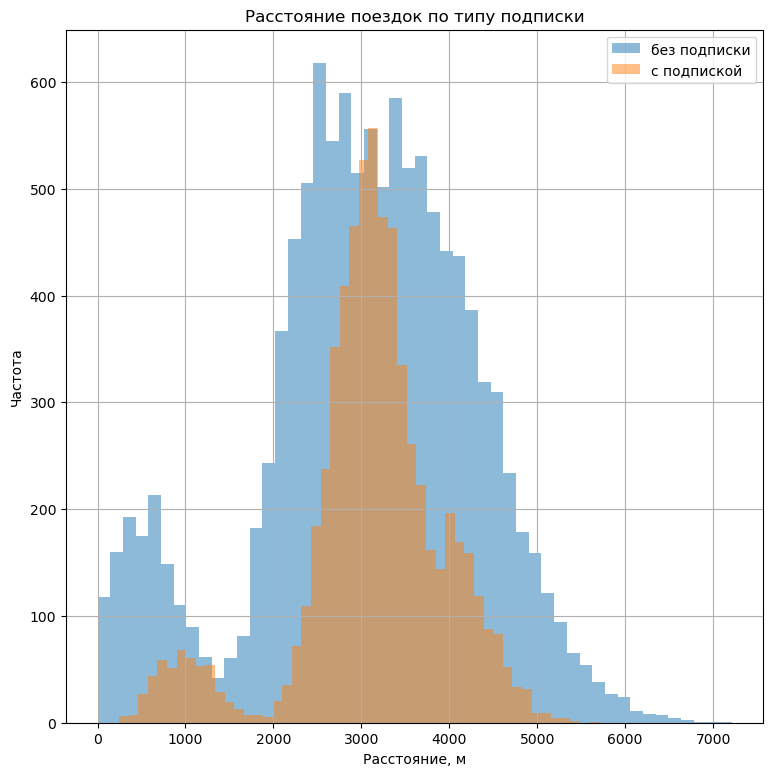

In [43]:
#построим две гистограммы на одном графике
data_subs_free['distance'].hist(label='без подписки', alpha=0.5, figsize=(9, 9), grid = True, bins = 50)
data_subs_ultra['distance'].hist(label='с подпиской', alpha=0.5, figsize=(9, 9), grid = True, bins = 50)

plt.legend(loc='upper right')
plt.title('Расстояние поездок по типу подписки')
plt.xlabel('Расстояние, м')
plt.ylabel('Частота')
plt.show()

Для большей наглядности построили 2 гистограммы на одном графике. Обе гистограммы имеют похожее распределение. Среднее значение в столбце distance с подпиской - 3115 м, а медиана - 3158 м. Среднее значение в столбце distance без подписки - 3045 м, а медиана - 3114 м. Пользователи без подписки чаще преодолевают расстояние в 2250 м, а пользователи с подпиской - 3100 м. Пользователи без подписки реже всего преодолевали расстояния в 1400-1500 м и более 5500 м, а пользователи с подпиской - 1500-2000 м и более 5000 м. 

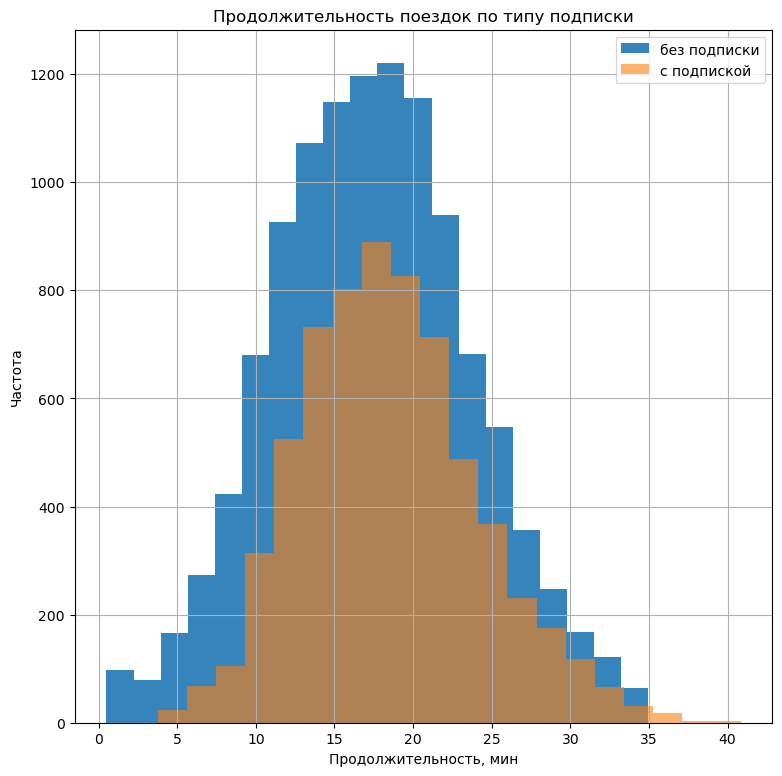

In [44]:
#построим две гистограммы на одном графике
data_subs_free['duration'].hist(label='без подписки', alpha=0.9, figsize=(9, 9), grid = True, bins = 20)
data_subs_ultra['duration'].hist(label='с подпиской', alpha=0.6, figsize=(9, 9), grid = True, bins = 20)

plt.legend(loc='upper right')
plt.title('Продолжительность поездок по типу подписки')
plt.xlabel('Продолжительность, мин')
plt.ylabel('Частота')
plt.show()

Так же для большей наглядности построили 2 гистограммы на одном графике. Обе гистограммы имеют похожее распределение. Среднее значение в столбце duration с подпиской - 18,5 мин, а медиана - 18 мин. Среднее значение в столбце duration без подписки - 17 мин, и медиана - 17 мин. Пользователи с подпиской и без в среднем тратят на поездку 17-18 мин. Пользователи без подписки редко тратят на поездки меньше 5 минут, а пользователи с подпиской - меньше 6 минут и больше 35 минут.

**Вывод:** На данном этапе мы объединили 3 датафрейма в один и на его основе создали 2 датафрейма с данными о пользователях с подпиской и без. Затем визуализировали информацию о расстоянии и времени поездок для пользователей обеих категорий, построив гистограммы. Было выявлено, что гистограммы по данным с подпиской и без имеют похожее распределение. В среднем пользователи с подпиской и без тратят одинаковое количество времени на одну поездку (17-18 минут). А что касается расстояния, пользователи без подписки чаще преодолевают расстояния в примерно 2250 метров, а пользователи с подпиской больше - примерно 3100 метров. 

## Подсчёт выручки

### Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц

In [45]:
#построим сводную таблицу
data_total_pivot = data_total.pivot_table(index=['user_id','month','subscription_type'],
                                          aggfunc = {'distance': sum, 'name': len, 'duration': sum}
                                          ).reset_index()
#переименуем названия столбцов
data_total_pivot.columns = ['user_id','month','subscription_type','total_distance','total_duration','rides_amount']

#проверим
data_total_pivot.head(10)

C:\Users\Эльвира\AppData\Local\Temp\ipykernel_27744\847279661.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data_total_pivot = data_total.pivot_table(index=['user_id','month','subscription_type'],
C:\Users\Эльвира\AppData\Local\Temp\ipykernel_27744\847279661.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data_total_pivot = data_total.pivot_table(index=['user_id','month','subscription_type'],


,user_id,month,subscription_type,total_distance,total_duration,rides_amount
0,1,1,ultra,7027.511294,41.416640,2
1,1,4,ultra,754.159807,6.232113,1
2,1,8,ultra,6723.470560,44.776802,2
3,1,10,ultra,5809.911100,31.578017,2
4,1,11,ultra,7003.499363,53.397424,3
5,1,12,ultra,6751.629942,27.203912,2
6,2,3,ultra,10187.723006,60.959959,3
7,2,4,ultra,6164.381824,39.048633,2
8,2,6,ultra,3255.338202,13.851127,1
9,2,7,ultra,6780.722964,46.170157,2


Создали датафрейм data_total_pivot с агрегированными данными о поездках.

In [46]:
#объединим полученную таблицу с исходной таблицей с инфо о подписках
data_final = data_total_pivot.merge(data_subs, on='subscription_type')

#построим сводную таблицу
data_final

,user_id,month,subscription_type,total_distance,total_duration,rides_amount,minute_price,start_ride_price,subscription_fee
0,1,1,ultra,7027.511294,41.416640,2,6,0,199
1,1,4,ultra,754.159807,6.232113,1,6,0,199
2,1,8,ultra,6723.470560,44.776802,2,6,0,199
3,1,10,ultra,5809.911100,31.578017,2,6,0,199
4,1,11,ultra,7003.499363,53.397424,3,6,0,199
...,...,...,...,...,...,...,...,...,...
11326,1534,6,free,3409.468534,24.812678,2,8,50,0
11327,1534,8,free,7622.453034,47.205960,2,8,50,0
11328,1534,9,free,4928.173852,22.560373,1,8,50,0
11329,1534,11,free,13350.015305,76.342174,4,8,50,0


Объединили полученную таблицу с исходной таблицей с информацией о подписках, получили датафрейм data_final. Данный шаг пригодится для расчета помесячной выручки на следующем этапе.

### В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь

In [47]:
#округлим данные в столбцах total_distance и total_duration
data_final['total_distance'] = np.round(data_final['total_distance'], decimals = 2)
data_final['total_duration'] = np.ceil(data_final['total_duration'])

#проверим
data_final

,user_id,month,subscription_type,total_distance,total_duration,rides_amount,minute_price,start_ride_price,subscription_fee
0,1,1,ultra,7027.51,42.0,2,6,0,199
1,1,4,ultra,754.16,7.0,1,6,0,199
2,1,8,ultra,6723.47,45.0,2,6,0,199
3,1,10,ultra,5809.91,32.0,2,6,0,199
4,1,11,ultra,7003.50,54.0,3,6,0,199
...,...,...,...,...,...,...,...,...,...
11326,1534,6,free,3409.47,25.0,2,8,50,0
11327,1534,8,free,7622.45,48.0,2,8,50,0
11328,1534,9,free,4928.17,23.0,1,8,50,0
11329,1534,11,free,13350.02,77.0,4,8,50,0


In [48]:
#создадим столбец с информацией о помесячной выручке
data_final['revenue_per_month'] = (data_final['start_ride_price'] * data_final['rides_amount']) + \
                            (data_final['minute_price'] * data_final['total_duration']) + data_final['subscription_fee']

#проверим
data_final

,user_id,month,subscription_type,total_distance,total_duration,rides_amount,minute_price,start_ride_price,subscription_fee,revenue_per_month
0,1,1,ultra,7027.51,42.0,2,6,0,199,451.0
1,1,4,ultra,754.16,7.0,1,6,0,199,241.0
2,1,8,ultra,6723.47,45.0,2,6,0,199,469.0
3,1,10,ultra,5809.91,32.0,2,6,0,199,391.0
4,1,11,ultra,7003.50,54.0,3,6,0,199,523.0
...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,free,3409.47,25.0,2,8,50,0,300.0
11327,1534,8,free,7622.45,48.0,2,8,50,0,484.0
11328,1534,9,free,4928.17,23.0,1,8,50,0,234.0
11329,1534,11,free,13350.02,77.0,4,8,50,0,816.0


**Вывод:** На данном этапе мы cоздали датафрейм с агрегированными данными о поездках (data_total_pivot) на основе датафрейма с объединёнными данными (data_total) из шага 4. Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. В этот же датафрейм добавили новый столбец с помесячной выручкой для каждого пользователя.

## Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу.

Сформулируем нулевую гипотезу H0: Пользователи с подпиской и без тратят одинаковое количество времени на поездки.

Сформулируем альтернативную гипотезу Н1: Пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.

In [49]:
# задаём уровень значимости
alpha = 0.05

# траты первой группы пользователей (с подпиской)
first_group_total = data_subs_ultra['duration']

# траты второй группы пользователей (без подписки)
second_group_total = data_subs_free['duration']

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу "больше"
results = st.ttest_ind(first_group_total, second_group_total, equal_var=False, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 5.6757813771289775e-37
Отвергаем нулевую гипотезу


Полученное значение p-value оказалось меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что пользователи с подпиской тратят больше времени на поездки.

### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим данную гипотезу.

Сформулируем нулевую гипотезу H0: Среднее расстояние одной поездки пользователей с подпиской равно 3130 метров.

Сформулируем альтернативную гипотезу Н1: Среднее расстояние одной поездки пользователей с подпиской превышает 3130 метров.

In [50]:
interested_value = 3130 # среднее оптимальное настроение 

alpha = 0.05 # уровень статистической значимости
            

results = st.ttest_1samp(
    data_subs_ultra['distance'], 
    interested_value, alternative='greater') # используем метод st.ttest_1samp

print('p-значение:', results.pvalue) 

# проверяем p-value
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value оказалось больше заданного уровня значимости, поэтому нулевая гипотеза не отвергается. Есть основания говорить, что среднее расстояние одной поездки пользователей с подпиской равно 3130 метров.

### Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Сформулируем нулевую гипотезу H0: Помесячная выручка от пользователей с подпиской по месяцам и без одинакова.

Сформулируем альтернативную гипотезу Н1: Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

In [51]:
# задаём уровень значимости
alpha = 0.05

# траты первой группы пользователей (с подпиской)
first_group = data_final[data_final['subscription_type'] == 'ultra']['revenue_per_month']

# траты второй группы пользователей (без подписки)
second_group = data_final[data_final['subscription_type'] == 'free']['revenue_per_month']

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу "больше"
results = st.ttest_ind(first_group, second_group, equal_var=False, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.0718729651261336e-44
Отвергаем нулевую гипотезу


Полученное значение p-value оказалось меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

### Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест нам понадобился бы для проверки этой гипотезы?

Для большего представления сформулируем нулевую и альтернативную гипотезы:
- Н0: среднее количество обращений в техподдержку после обновления серверов осталось прежним.
- Н1: среднее количество обращений в техподдержку после обновления серверов снизилось.

В данном случае будет целесообразно воспользоваться односторонним тестом для проверки гипотезы, с помощью метода scipy.stats.ttest_1samp(), с аргументом alternative='less' левосторонней Н1, т.к. согласно альтернативной гипотезе количество обращений в техподдержку снижается.

**Вывод:** На данном этапе были проверены некоторые гипотезы продакт-менеджеров. На основе проведенных тестов есть основания говорить, что:
- пользователи с подпиской тратят больше времени на поездки;
- среднее расстояние одной поездки пользователей с подпиской равно 3130 метров;
- помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

На этапе 6.4. предположили, что наиболее подходящим тестом будет односторонний тест для проверки гипотезы, с помощью метода scipy.stats.ttest_1samp(), с аргументом alternative='less' левосторонней Н1.

## Общий вывод

Для получения корректных результатов исследования исходные таблицы были успешно преобразованы на этапе предобработки.

В ходе исследования были выявлены характеристики самых распространенных поездок:
- поездки чаще всего совершались в Пятигорске;
- пользователи предпочитают совершать поездки без оформления подписки;
- самый популярный пользователь - в возрасте 25 лет;
- в среднем пользователи преодолевают расстояние от 3000 до 3250 м;
- в среднем каждый пользователь тратит на одну поездку 17,5-18 мин.

Для подробного анализа были объединены 3 исходных датафрейма в один и на его основе создали 2 датафрейма с данными о пользователях с подпиской и без. Затем визуализировали информацию о расстоянии и времени поездок для пользователей обеих категорий, построив гистограммы. Было выявлено, что в среднем пользователи с подпиской и без тратят одинаковое количество времени на одну поездку (17-18 минут). А что касается расстояния, пользователи без подписки чаще преодолевают расстояния в примерно 2250 метров, а пользователи с подпиской больше - примерно 3100 метров.

В ходе анализа был cоздан датафрейм с агрегированными данными о поездках. Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. В этот же датафрейм был добавлен новый столбец с помесячной выручкой для каждого пользователя.

Также были проверены гипотезы, предложенные продакт-менеджерами сервиса GoFast. Получив результаты проведенных тестов, можем передать коллегам, что:
- пользователи с подпиской тратят больше времени на поездки;
- среднее расстояние одной поездки пользователей с подпиской равно 3130 метров;
- помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Продакт-менеджерам стоит разработать привлекательные акции для существующих пользователей, чтобы они были заинтересованы в оформлении подписки сервиса. Ведь есть основания предполагать, что пользователи с подпиской "выгоднее" для сервиса GoFast.